# Tools

In [33]:
import pandas as pd

In [34]:
from IPython.display import display

In [35]:
import matplotlib.pyplot as plt

In [36]:
import numpy as np

In [37]:
from matplotlib import cm

In [38]:
from itertools import combinations

In [39]:
from matplotlib import colormaps

In [40]:
import networkx as nx

In [41]:
import matplotlib.pyplot as plt

In [42]:
import plotly.graph_objects as go

In [43]:
import seaborn as sns

# Main codes

### 1 Import, view and exclude data

#### 1.1 Import data

In [44]:
df = pd.read_excel("MRVdata_1709.xlsx")
pd.options.display.max_columns = None
#display(df)
#code above: shows excel table

#### 1.2 Overview of data

In [45]:
df['Inclusion/exclusion'].value_counts() 
#--> 205 studies included, 180 excluded, 14 no access

Inclusion/exclusion
Exclusion             195
Inclusion             188
No access to paper     13
Name: count, dtype: int64

#### 1.3 Exclude data

In [46]:
# filter data frame to exclude studies from 2024
df_filtered = df[df['Year'] != 2024]

In [47]:
df_included = df_filtered[df_filtered['Inclusion/exclusion'] == 'Inclusion'] # new dataframe defined to exclude studies without access or excluded papers
df_included['Inclusion/exclusion'].value_counts()
#code above: controll new data frame

Inclusion/exclusion
Inclusion    186
Name: count, dtype: int64

### 2 Study location

#### 2.1 Overview of included study locations

In [48]:
df_included['Study location'].value_counts()
#Results: most common study locations are not specified, multiple countries, US, China and Australia

Study location
Not specified         49
USA                   23
China                 17
Multiple countries    16
Australia             13
Germany                6
South Africa           5
France                 4
Iran                   4
Global                 4
UK                     4
Spain                  3
Canada                 3
Finland                3
Brazil                 2
Colombia               2
Japan                  2
Thailand               2
Sweden                 2
Netherlands            2
Indonesia              2
Italy                  2
Austria                1
Czech Republic         1
Cambodia               1
Benin                  1
India                  1
DR Congo               1
Taiwan                 1
Malaysia               1
Greece                 1
Ecuador                1
Guatemala              1
Ethiopia               1
Switzerland            1
Portugal               1
Nigeria                1
Poland                 1
Name: count, dtype: int64

In [49]:
df_included['Study location: specification'].value_counts()
# Result: No specific pattern visible at first glance. Often neighbouring countries or definitions of maritime regions

Study location: specification
EU                                                                                                               2
Southern Ocean; Atlantic sector                                                                                  1
Southern Ocean; Australasian-Pacific Sector                                                                      1
UK & France                                                                                                      1
Southern Ocean                                                                                                   1
UK based power plant with feedstock from different locations around the world                                    1
EU, UK, US                                                                                                       1
China, Democratic People's Republic of Korea, Republic of Korea                                                  1
Denmark, Sweden, Switzerland, UK                  

#### 2.2 Grouping of study location

In [50]:
# read excel file with continent data 
continent_data = pd.read_excel('continents.xlsx')

# create a dictionary for the assignment of countries to continents
country_to_continent = dict(zip(continent_data['Country'], continent_data['Continent']))

# Function to determine the continent based on the country
def get_continent(study_location, continent_column): #part of the function, not column names of the df; will be defined later when function is applied
    if pd.isna(study_location):
        return "Unknown"
    if study_location == "Multiple countries":
        return continent_column  # uses the manually definied continents for the category "Multiple countries"
    return country_to_continent.get(study_location.strip(), "Not specified")  # Search for the country in the dictionary and return the continent or 'not specified'

# avoid warning
df_included = df_included.copy()

# apply function to df_included
df_included['Study location_continent'] = df_included.apply(
    lambda row: get_continent(row['Study location'], row['Study location: Continent']),
    axis=1
)

#pd.options.display.max_columns = None
#display(df_included)

In [51]:
df_included['Study location_continent'].value_counts()

Study location_continent
Not specified    53
Europe           41
USA              23
China            17
Asia             15
Oceania          13
Africa            9
Global            6
South America     5
North America     4
Name: count, dtype: int64

#### Figure 1: Number of MRV publications per study location

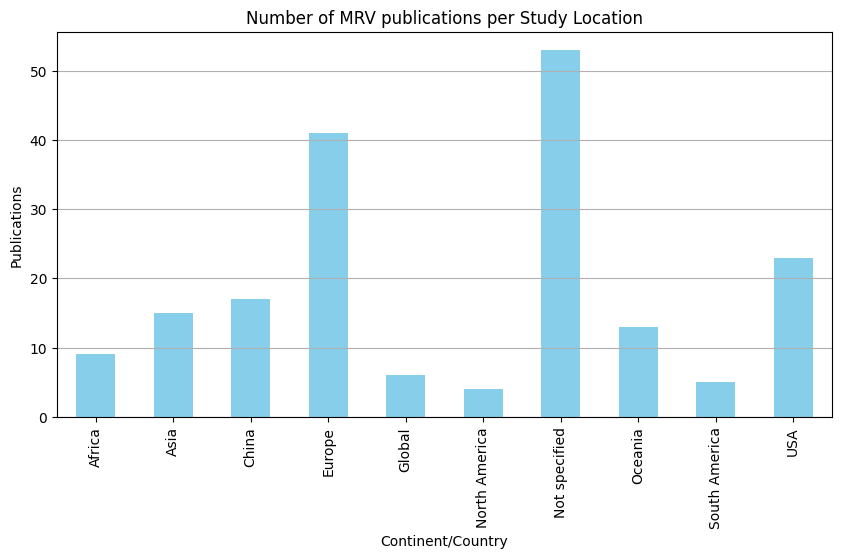

In [52]:
#papers per study location
papers_per_location= df_included['Study location_continent'].value_counts().sort_index()

# bar chart for papers per year
plt.figure(figsize=(10, 5))
papers_per_location.plot(kind='bar', color='skyblue')
plt.title('Number of MRV publications per Study Location')
plt.xlabel('Continent/Country')
plt.ylabel('Publications')
plt.grid(axis='y')
plt.show()

### 3 Publication date

#### 3.1 Overview of included publication dates

In [53]:
df_included.groupby('Year').size() # Results: most of our included studies were published 2019 and later

Year
2000.0     2
2001.0     2
2003.0     1
2004.0     3
2005.0     4
2006.0     1
2007.0     1
2008.0     3
2009.0     5
2010.0     2
2011.0     2
2012.0     3
2013.0     2
2014.0     7
2015.0     3
2016.0     3
2017.0     5
2018.0     5
2019.0    10
2020.0    22
2021.0    27
2022.0    39
2023.0    34
dtype: int64

#### Figure 2: Number of MRV Publications per year

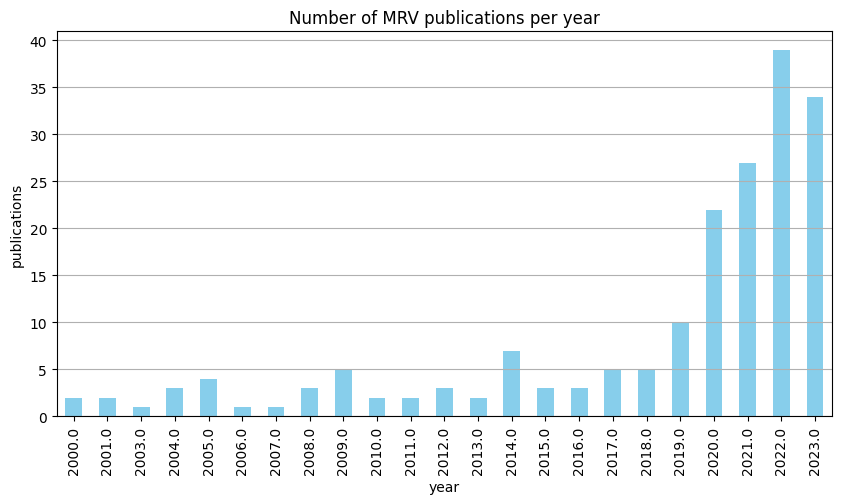

In [54]:
#papers per year
papers_per_year = df_included['Year'].value_counts().sort_index()

# bar chart for papers per year
plt.figure(figsize=(10, 5))
papers_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of MRV publications per year')
plt.xlabel('year')
plt.ylabel('publications')
plt.grid(axis='y')
plt.show()

### 4 CDR method and study focus

#### 4.1 Definition CDR methods & color scheme

In [55]:
#columns with all CDR methods
CDR_columns = ['BECCS', 'General forestry', 'A/R', 'Agroforestry', 'Forest management', 'DACCS', 'EW', 'OAE', 'OIF/AU', 'Biochar', 'SCS', 'Blue carbon', 'Restoration of landscapes and peats', 'CCUS', 'Other', 'General CDR', 'DOC', 'Algae ', 'CCS']

In [56]:
# Define the custom color scheme for each CDR method
custom_colors_CDR_method = {
    'BECCS': '#f4d6ae', 'General forestry': '#bcbd22', 'A/R': '#aab792', 
    'Agroforestry': '#e9ede2', 'Forest management': '#d2bfac', 'DACCS': '#dd7500',
    'EW': '#d6b8c1', 'OAE': '#ecf1f9', 'OIF/AU': '#709fca', 'Biochar': '#b7768bff',
    'SCS': '#769112', 'Blue carbon': '#d8e3f1', 'Restoration of landscapes and peats': '#d3dbc7',
    'CCUS': '#e377c2', 'Other': '#e5e5e5', 'General CDR': '#e5b138', 'DOC': '#17becf',
    'Algae ': '#2ca02c', 'CCS': '#d62728'
}

#### 4.2 Overview of CDR methods & foci

In [57]:
# nummber of main focus per CDR method
CDR_maintopic = (df_included[CDR_columns] == 1).sum()
CDR_maintopic_sorted = CDR_maintopic.sort_values(ascending=False)
#print(CDR_maintopic_sorted)
# Result: A/R, SCS and EW are the most common CDR side topics used in the context of MRV

In [58]:
#number of side topic per CDR method
CDR_sidetopic = (df_included[CDR_columns] == 2).sum()
CDR_sidetopic_sorted = CDR_sidetopic.sort_values(ascending=False)
#print(CDR_sidetopic_sorted)
# Result: A/R, SCS and EW are the most common CDR side topics used in the context of MRV

In [59]:
# number of framings per CDR methods
CDR_framing = (df_included[CDR_columns] == 3).sum()
CDR_framing_sorted = CDR_framing.sort_values(ascending=False)
#print(CDR_framing_sorted)
# Result: BECCS, FM, Agroforestry, SCS and blue carbon rarely used as framings in the context of MRV

In [60]:
# Results for all CDR technologies regardless if it is mentioned as main/sidetopic or framing
CDR_method = (df_included[CDR_columns] > 0).sum()
CDR_method_sorted = CDR_method.sort_values(ascending=False)
#print(CDR_method_sorted)
# Decided to analyse year of publication, study location, etc. per CDR method, regardless of whether the method is only mentioned or the main topic of the articles (even if it is mentioned, the author had the intention to include the results of the study for that method)

#### Figure 3: Shares of CDR Methods in the Sample

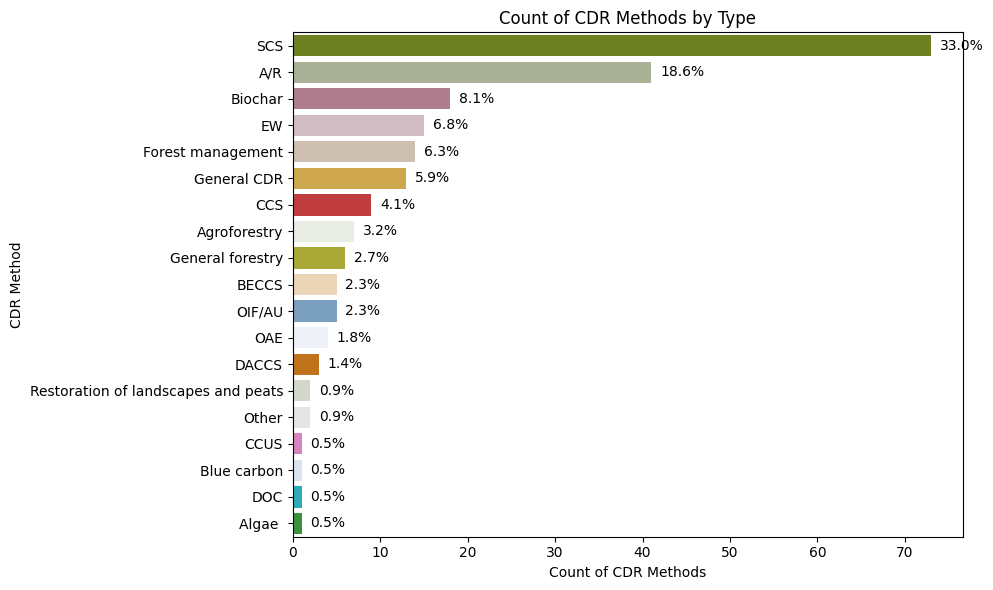

In [61]:
#Overview graphic for all CDR methods in the color scheme

# Generate a list of colors based on the sorted CDR methods
colors_CDR_method = [custom_colors_CDR_method[method] for method in CDR_method_sorted.index]

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create the horizontal bar plot with custom colors and assign hue to the y variable
sns.barplot(x=CDR_method_sorted.values, y=CDR_method_sorted.index, hue=CDR_method_sorted.index, palette=colors_CDR_method, dodge=False, legend=False)

# Add the percentages behind the bars
total = CDR_method_sorted.sum()
for i, value in enumerate(CDR_method_sorted):
    percentage = 100 * value / total
    plt.text(value + 1, i, f'{percentage:.1f}%', va='center')  # Add 1 to move the percentage text slightly away from the bar

# Set plot labels and title
plt.xlabel('Count of CDR Methods')
plt.ylabel('CDR Method')
plt.title('Count of CDR Methods by Type')

# Show the plot
plt.tight_layout()
plt.show()

In [62]:
#add new column for CDR method and study focus in the dataset
def extract_CDR_method_focus(row):
    CDR_method = []
    CDR_focus = []
    
    for column in CDR_columns:  # previously defined list with columns that contain CDR methods
        if row[column] > 0:
            CDR_method.append(column)
            CDR_focus.append(row[column])
    
    return pd.Series([CDR_method, CDR_focus])

# new copy of the data set to avoid warning
df_included = df_included.copy()

# add new columns to the data frame
df_included['CDR_method'] = df_included.apply(lambda row: extract_CDR_method_focus(row)[0], axis=1)
df_included['CDR_focus'] = df_included.apply(lambda row: extract_CDR_method_focus(row)[1], axis=1)

#display dataset to see if newly added columns are correct
#pd.options.display.max_columns = None
#display(df_included)

### 5 MRV topics and study focus

#### 5.1 Definition MRV groups & color scheme

In [63]:
#columns with all MRV topics
MRV_columns = ['General MRV', 'Quantification', 'Monitoring', 'Quality', 'Governance', 'Reporting', 'Verification', 'External impacts']

In [64]:
# Define the new custom color scheme for MRV topics
mrv_topic_colors = {
    'General MRV': '#e5b138',      # muted yellow
    'Quantification': '#7da7b8',   # darker bluish-grey
    'Monitoring': '#8dc39f',        # stronger soft green
    'Quality': '#c76a85',           # berry red
    'Governance': '#b39bc8',        # stronger lavender
    'Reporting': '#e1a6b8',         # stronger soft pink
    'Verification': '#a8a8a8',      # medium grey
    'External impacts': '#d0c97b'   # stronger soft yellow
}

#### 5.2 Overview of MRV topics & foci

In [65]:
# nummber of main focus per MRV study topics
MRV_maintopic = (df_included[MRV_columns] == 1).sum()
MRV_maintopic_sorted = MRV_maintopic.sort_values(ascending=False)
#print(MRV_maintopic_sorted)
# Result: Quantification is the main topic (in 165 studies), followed by Monitoring (18 studies) and Quality (15 studies)

In [66]:
# nummber of side focus per MRV study topics
MRV_maintopic = (df_included[MRV_columns] == 2).sum()
MRV_maintopic_sorted = MRV_maintopic.sort_values(ascending=False)
#print(MRV_maintopic_sorted)
# Result: Quantification is also the the main side focus (in 18 studies), followed by Monitoring (18 studies) and Quality (17 studies)

In [67]:
# nummber of all focuses per MRV study topics
MRV_topic = (df_included[MRV_columns] > 0).sum()
MRV_topic_sorted = MRV_topic.sort_values(ascending=False)
#print(MRV_topic_sorted)

#### Figure 4: Distribution of MRV topics

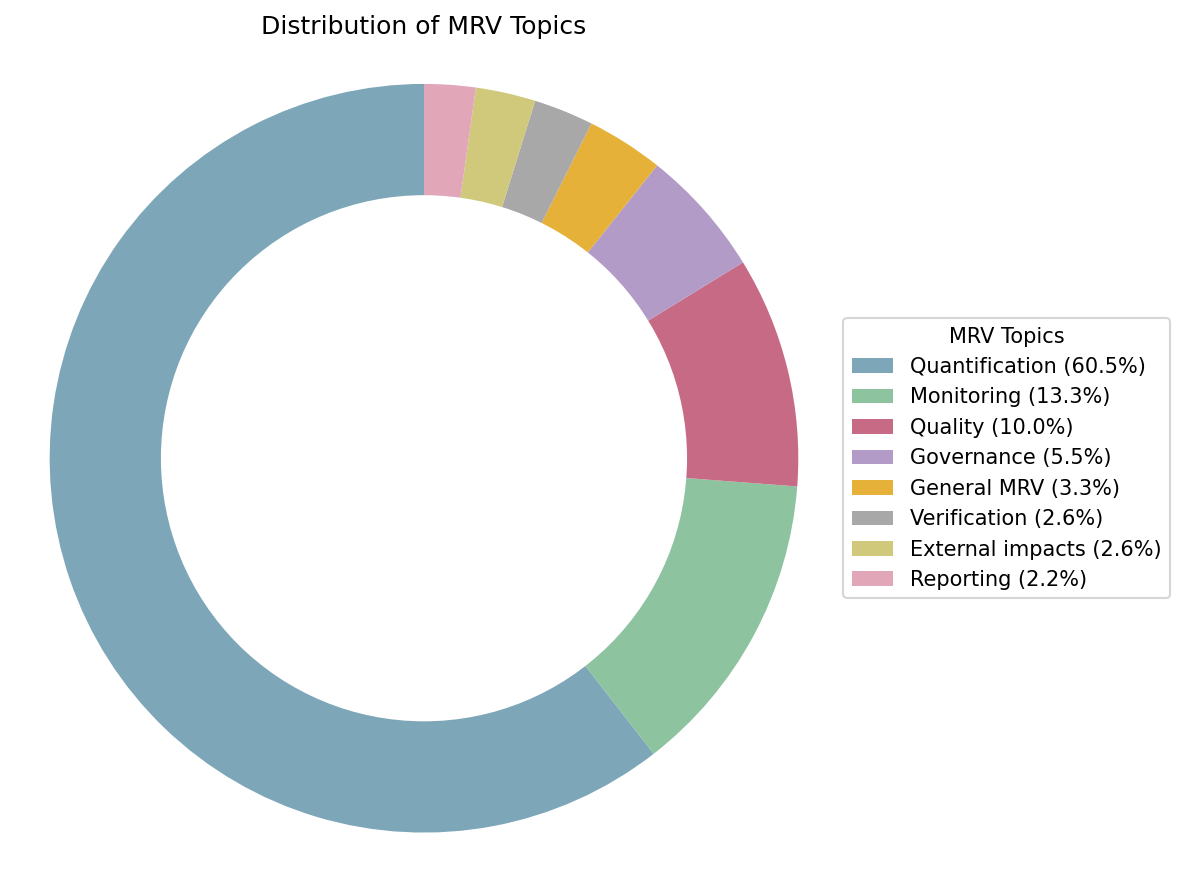

In [68]:
#Overview graphic for all MRV topics 

# Calculate the counts for each MRV topic
mrv_topic_counts = MRV_topic_sorted

# Create the pie chart
fig, ax = plt.subplots(dpi=150, figsize=(8, 6))

# Create the pie chart without percentages displayed
wedges, texts = ax.pie(mrv_topic_counts, 
                       labels=None, 
                       colors=[mrv_topic_colors[topic] for topic in mrv_topic_counts.index],
                       startangle=90,
                       textprops=dict(color="black"))

# Add a white circle in the middle to make it a donut chart
white_circle = plt.Circle((0, 0), 0.70, color='white')
ax.add_artist(white_circle)

# Create legend labels with percentages
legend_labels = [f'{topic} ({100 * count / mrv_topic_counts.sum():.1f}%)' for topic, count in zip(mrv_topic_counts.index, mrv_topic_counts)]

# Place the legend next to the pie chart
ax.legend(wedges, legend_labels, 
          title="MRV Topics", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Set plot title
plt.title('Distribution of MRV Topics')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.tight_layout()

In [69]:
#add new column for MRV topic and study focus to the dataset
def extract_MRV_topic_focus(row):
    MRV_topic = []
    MRV_focus = []
    
    for column in MRV_columns:  # previously defined list with columns that contain MRV topics
        if row[column] > 0:
            MRV_topic.append(column)
            MRV_focus.append(row[column])
    
    return pd.Series([MRV_topic, MRV_focus])

# new copy of the data set to avoid warning
df_included = df_included.copy()

# add new columns to the data frame
df_included['MRV_topic'] = df_included.apply(lambda row: extract_MRV_topic_focus(row)[0], axis=1)
df_included['MRV_focus'] = df_included.apply(lambda row: extract_MRV_topic_focus(row)[1], axis=1)

#display dataset to see if newly added columns are correct
#pd.options.display.max_columns = None
#display(df_included)

### 6 Exploded dataset: CDR group

#### 6.1 Datset explosion

In [70]:
# explode CDR method and focus
df_CDRexplode = df_included.explode(['CDR_method', 'CDR_focus'])

# explode MRV topic and focus
df_exploded = df_CDRexplode.explode(['MRV_topic', 'MRV_focus'])

# every CDR method and every MRV topic is in one line (in combination with study focus)

#display dataset to see if newly added columns are correct
#pd.options.display.max_columns = None
#display(df_exploded)

#### 6.2 Definition CDR groups & color scheme

In [71]:
# Group CDR Methods to marine, terrestrial, and CCS technologies. Keep A/R and SCS as individual technologies
cdr_group_mapping = {
     # Marine CDR group
    "OIF/AU":"Marine CDR",
    "Blue carbon": "Marine CDR",
    "OAE": "Marine CDR",
    "DOC": "Marine CDR",
    "Algae ": "Marine CDR",
    
    # Terrestrial CDR group
    "EW": "Terrestrial CDR",
    "Biochar": "Terrestrial CDR",
    "Restoration of landscapes and peats": "Terrestrial CDR",
    
    # CCS group
    "DACCS": "CCS",
    "BECCS": "CCS",
    "CCUS": "CCS",
    "CCS": "CCS",
    
    # General CDR/Other group
    "General CDR": "General CDR/Other",
    "Other": "General CDR/Other",

    # SCS
    "SCS": "SCS",

    # Forestry
    "General forestry": "Forestry",
    "A/R": "Forestry",
    "Agroforestry": "Forestry",
    "Forest management": "Forestry",
}
# Create a new column ‘CDR_group’ in df_exploded based on the ‘CDR_method’ column
df_exploded['CDR_group'] = df_exploded['CDR_method'].map(cdr_group_mapping)

# Display the updated DataFrame
#pd.options.display.max_columns = None  # Show all columns
#display(df_exploded)

In [97]:
# Define the custom color scheme for each CDR group
cdr_group_colors = {
    "Marine CDR": '#7eaed3',    # bluew for Marine CDR
    "Terrestrial CDR": '#b2df8a',  # green for Terrestrial CDR
    "CCS": '#ff7f00',            # orange for CCS
    "General CDR/Other": '#e5e5e5', # grey for General/Other
    "SCS": '#C1A28A' ,            # brown for SCS
    "Forestry": '#8fbc8f'         # green for Forestry
}


#### Figure 5: Distribution of CDR groups

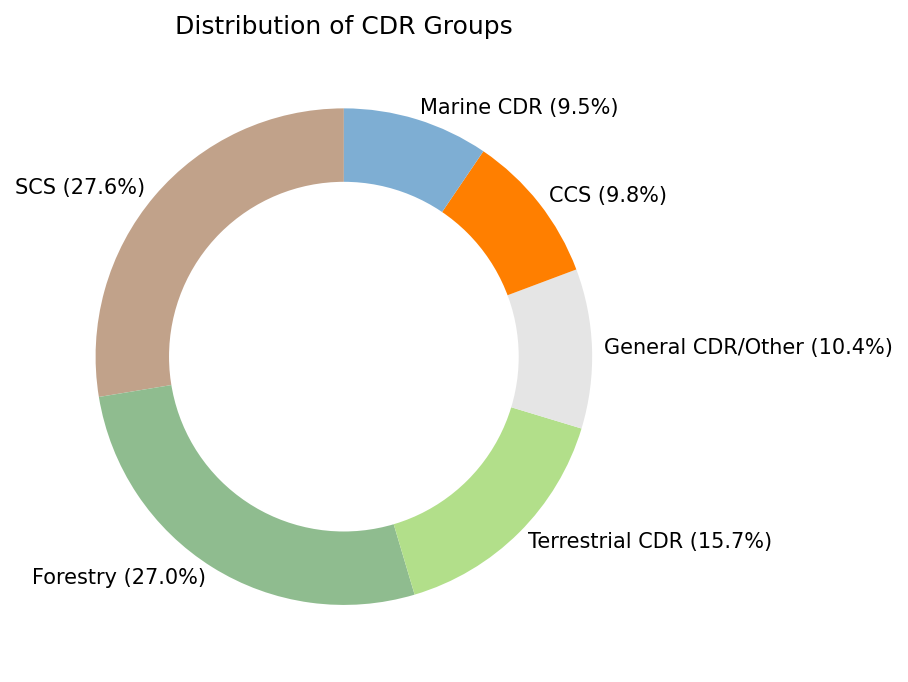

In [98]:
# Calculate the counts for each CDR group
cdr_group_counts = df_exploded['CDR_group'].value_counts()

# Define the labels with percentages in parentheses
labels = [f'{group} ({percentage:.1f}%)' for group, percentage in zip(cdr_group_counts.index, 
                                                                      100 * cdr_group_counts / cdr_group_counts.sum())]

# Set the colors for each group
colors = [cdr_group_colors[group] for group in cdr_group_counts.index]

# Create the pie chart
fig, ax = plt.subplots(dpi=150, figsize=(6, 6))

plt.pie(cdr_group_counts, labels=labels, colors=colors, startangle=90, labeldistance=1.05)

# Add a white circle in the middle to make it a donut chart
white_circle = plt.Circle((0, 0), 0.70, color='white')
p = plt.gcf()
p.gca().add_artist(white_circle)

# Set plot title
plt.title('Distribution of CDR Groups')

# Show the plot
plt.tight_layout()
plt.show()